In [ ]:
import pandas as pd
import numpy as np

Cleaning dataset ( Companies )

In [ ]:
companies = pd.read_csv("companies.csv")
companies.info()
companies.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24473 entries, 0 to 24472
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_id    24473 non-null  int64  
 1   name          24472 non-null  object 
 2   description   24176 non-null  object 
 3   company_size  21699 non-null  float64
 4   state         24451 non-null  object 
 5   country       24473 non-null  object 
 6   city          24472 non-null  object 
 7   zip_code      24445 non-null  object 
 8   address       24451 non-null  object 
 9   url           24473 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.9+ MB


,0
company_id,0
name,1
description,297
company_size,2774
state,22
country,0
city,1
zip_code,28
address,22
url,0


In [ ]:
companies.duplicated().sum()

np.int64(0)

In [ ]:
company_industries = pd.read_csv("company_industries.csv")

company_industries.info()
company_industries.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24375 entries, 0 to 24374
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company_id  24375 non-null  int64 
 1   industry    24375 non-null  object
dtypes: int64(1), object(1)
memory usage: 381.0+ KB


,0
company_id,0
industry,0


In [ ]:
company_industries.duplicated().sum()

np.int64(0)

In [ ]:
employee_counts = pd.read_csv("employee_counts.csv")

employee_counts.info()
employee_counts.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35787 entries, 0 to 35786
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   company_id      35787 non-null  int64
 1   employee_count  35787 non-null  int64
 2   follower_count  35787 non-null  int64
 3   time_recorded   35787 non-null  int64
dtypes: int64(4)
memory usage: 1.1 MB


,0
company_id,0
employee_count,0
follower_count,0
time_recorded,0


In [ ]:
employee_counts.duplicated().sum()

np.int64(0)

In [ ]:
company_specialities = pd.read_csv("company_specialities.csv")

company_specialities.info()
company_specialities.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169387 entries, 0 to 169386
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   company_id  169387 non-null  int64 
 1   speciality  169387 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.6+ MB


,0
company_id,0
speciality,0


**Cleaning companies data **

In [ ]:

#cleaning compaines.csv

# Remove duplicate company IDs
companies = companies.drop_duplicates(subset=["company_id"])

# Clean text fields
companies["name"] = companies["name"].astype(str).str.strip().str.title()
companies["city"] = companies["city"].astype(str).str.strip().str.title()
companies["state"] = companies["state"].astype(str).str.strip().str.title()
companies["country"] = companies["country"].astype(str).str.strip().str.title()
companies["address"] = companies["address"].astype(str).str.strip().str.title()

# Fix company_size (convert float to text)
companies["company_size"] = (
    companies["company_size"]
    .astype(str)
    .str.strip()
    .str.lower()
    .replace("nan", None)
)

# Fix zip_code formatting
companies["zip_code"] = companies["zip_code"].astype(str).str.strip()


In [ ]:
# checking after cleaning
companies.info()
companies.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24473 entries, 0 to 24472
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    24473 non-null  int64 
 1   name          24473 non-null  object
 2   description   24176 non-null  object
 3   company_size  21699 non-null  object
 4   state         24473 non-null  object
 5   country       24473 non-null  object
 6   city          24473 non-null  object
 7   zip_code      24473 non-null  object
 8   address       24473 non-null  object
 9   url           24473 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.9+ MB


,0
company_id,0
name,0
description,297
company_size,2774
state,0
country,0
city,0
zip_code,0
address,0
url,0


In [ ]:
company_industries.columns

Index(['company_id', 'industry'], dtype='object')

In [ ]:
# cleaning company_industries.csv
# Remove duplicates
company_industries = company_industries.drop_duplicates()

# Remove missing industry values
company_industries = company_industries.dropna(subset=["industry"])

# Keep only companies that exist in companies.csv
company_industries = company_industries[
    company_industries["company_id"].isin(companies["company_id"])
]

In [ ]:
#checking company_industries after cleaning

company_industries.info()
company_industries.isna().sum()
company_industries.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24375 entries, 0 to 24374
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company_id  24375 non-null  int64 
 1   industry    24375 non-null  object
dtypes: int64(1), object(1)
memory usage: 381.0+ KB


,company_id,industry
0,391906,Book and Periodical Publishing
1,22292832,Construction
2,20300,Banking
3,3570660,Book and Periodical Publishing
4,878353,Staffing and Recruiting
5,729238,IT Services and IT Consulting
6,766849,Staffing and Recruiting
7,12828,Food and Beverage Services
8,2934678,IT Services and IT Consulting
9,15984730,IT Services and IT Consulting


In [ ]:

# cleaning employee_counts.csv


employee_counts = pd.read_csv("employee_counts.csv")

# convert timestamp to datetime
employee_counts["time_recorded"] = pd.to_datetime(
    employee_counts["time_recorded"],
    errors="coerce",
    unit="ms"
)

# convert employee_count to numeric
employee_counts["employee_count"] = pd.to_numeric(
    employee_counts["employee_count"],
    errors="coerce"
)

# keeping only the latest record per company
employee_counts = (
    employee_counts
    .sort_values("time_recorded")
    .drop_duplicates(subset=["company_id"], keep="last")
)


In [ ]:
#check after cleaning

employee_counts.info()
employee_counts.isna().sum()
employee_counts.head(10)



<class 'pandas.core.frame.DataFrame'>
Index: 24473 entries, 14 to 35786
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   company_id      24473 non-null  int64         
 1   employee_count  24473 non-null  int64         
 2   follower_count  24473 non-null  int64         
 3   time_recorded   24473 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 956.0 KB


,company_id,employee_count,follower_count,time_recorded
14,34214892,79,828,1970-01-20 19:39:06.173
12,6618000,11,7478,1970-01-20 19:39:06.173
11,947812,102,2831,1970-01-20 19:39:06.173
10,34771607,3,181,1970-01-20 19:39:06.173
4,878353,52,26397,1970-01-20 19:39:06.173
31,3556531,64,1781,1970-01-20 19:39:06.248
36,7790573,16,233,1970-01-20 19:39:06.248
35,90869,17,9909,1970-01-20 19:39:06.248
30,349088,744,10689,1970-01-20 19:39:06.248
25,7164053,108,2036,1970-01-20 19:39:06.248


In [ ]:
# cleaning company_specialities.csv

company_specialities = pd.read_csv("company_specialities.csv")

# Remove duplicate rows
company_specialities = company_specialities.drop_duplicates()

# Clean text
company_specialities["speciality"] = (
    company_specialities["speciality"]
    .astype(str)
    .str.strip()
    .str.title()
)

# Keep only valid company IDs
company_specialities = company_specialities[
    company_specialities["company_id"].isin(companies["company_id"])
]

In [ ]:
#checking after cleaning

company_specialities.info()
company_specialities.isna().sum()
company_specialities.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169387 entries, 0 to 169386
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   company_id  169387 non-null  int64 
 1   speciality  169387 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.6+ MB


,company_id,speciality
0,22292832,Window Replacement
1,22292832,Patio Door Replacement
2,20300,Commercial Banking
3,20300,Retail Banking
4,20300,Mortgage
5,20300,Private Banking
6,20300,Trust Services
7,20300,Insurance
8,20300,Wealth Management
9,3570660,Advertising


In [ ]:
companies.to_csv("clean_companies.csv", index=False)
company_industries.to_csv("clean_company_industries.csv", index=False)
employee_counts.to_csv("clean_employee_counts.csv", index=False)
company_specialities.to_csv("clean_company_specialities.csv", index=False)

Cleaning Dataset ( job )


In [ ]:

# Load the data (corrected from previous turn)
job_skills = pd.read_csv('job_skills.csv')

# Re-run dropna after loading data
job_skills = job_skills.dropna()

# Display the head to confirm
display(job_skills.head())
print(job_skills.isnull().sum())

,job_id,skill_abr
0,3884428798,MRKT
1,3884428798,PR
2,3884428798,WRT
3,3887473071,SALE
4,3887465684,FIN


job_id       0
skill_abr    0
dtype: int64


In [ ]:
non_numeric_cols = job_skills.select_dtypes(exclude=['number', 'int', 'float']).columns
print(non_numeric_cols)

Index(['skill_abr'], dtype='object')


In [ ]:
print(f"Number of duplicate rows: {job_skills.duplicated().sum()}\n")

print("Unique values and counts for 'job_id':\n")
print(job_skills['job_id'].value_counts())

print("\nUnique values and counts for 'skill_abr':\n")
print(job_skills['skill_abr'].value_counts())

Number of duplicate rows: 0

Unique values and counts for 'job_id':

job_id
3905631490    3
3891081674    3
3902314651    3
3891078838    3
3891083511    3
             ..
3901351835    1
3902876855    1
3902879720    1
3902866633    1
3902883232    1
Name: count, Length: 126807, dtype: int64

Unique values and counts for 'skill_abr':

skill_abr
IT      26137
SALE    22475
MGMT    20861
MNFC    18185
HCPR    17369
BD      14290
ENG     13009
OTHR    12608
FIN      8540
MRKT     5525
ACCT     5461
ADM      4860
CUST     4292
PRJM     3997
ANLS     3858
RSCH     2986
HR       2647
LGL      2371
CNSL     2338
EDU      2290
DSGN     2244
TRNG     2243
GENB     1984
QA       1791
ART      1664
WRT      1443
PRDM     1362
PR       1298
SUPL     1180
STRA     1178
SCI       813
PROD      762
ADVR      681
PRCH      610
DIST      416
Name: count, dtype: int64


In [ ]:
df_salaries = pd.read_csv('salaries.csv')
df_salaries.head()

,salary_id,job_id,max_salary,med_salary,min_salary,pay_period,currency,compensation_type
0,1,3884428798,NaN,20.0,NaN,HOURLY,USD,BASE_SALARY
1,2,3887470552,25.0,NaN,23.0,HOURLY,USD,BASE_SALARY
2,3,3884431523,120000.0,NaN,100000.0,YEARLY,USD,BASE_SALARY
3,4,3884911725,200000.0,NaN,10000.0,YEARLY,USD,BASE_SALARY
4,5,3887473220,35.0,NaN,33.0,HOURLY,USD,BASE_SALARY


In [ ]:
print(f"Number of duplicate rows in df_salaries: {df_salaries.duplicated().sum()}")
df_salaries.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {len(df_salaries)}")

Number of duplicate rows in df_salaries: 0
Number of rows after removing duplicates: 40785


In [ ]:
print("Missing values in df_salaries before cleaning:")
print(df_salaries.isnull().sum())

Missing values in df_salaries before cleaning:
salary_id                0
job_id                   0
max_salary            6838
med_salary           33947
min_salary            6838
pay_period               0
currency                 0
compensation_type        0
dtype: int64


In [ ]:
df_salaries['med_salary'] = df_salaries['med_salary'].fillna(
    (df_salaries['min_salary'] + df_salaries['max_salary']) / 2
)
df_salaries[['min_salary', 'max_salary', 'med_salary']] = df_salaries[['min_salary', 'max_salary', 'med_salary']].fillna(0)

print("Missing values in df_salaries after cleaning:")
print(df_salaries.isnull().sum())

Missing values in df_salaries after cleaning:
salary_id            0
job_id               0
max_salary           0
med_salary           0
min_salary           0
pay_period           0
currency             0
compensation_type    0
dtype: int64


In [ ]:
print("Data types of df_salaries columns:")
print(df_salaries.dtypes)

Data types of df_salaries columns:
salary_id              int64
job_id                 int64
max_salary           float64
med_salary           float64
min_salary           float64
pay_period            object
currency              object
compensation_type     object
dtype: object


In [ ]:
print("Unique values and counts for 'pay_period':\n")
print(df_salaries['pay_period'].value_counts())

print("\nUnique values and counts for 'currency':\n")
print(df_salaries['currency'].value_counts())

print("\nUnique values and counts for 'compensation_type':\n")
print(df_salaries['compensation_type'].value_counts())

Unique values and counts for 'pay_period':

pay_period
YEARLY      23768
HOURLY      16289
MONTHLY       539
WEEKLY        180
BIWEEKLY        9
Name: count, dtype: int64

Unique values and counts for 'currency':

currency
USD    40770
EUR        6
CAD        3
BBD        2
AUD        2
GBP        2
Name: count, dtype: int64

Unique values and counts for 'compensation_type':

compensation_type
BASE_SALARY    40785
Name: count, dtype: int64


In [ ]:
print("Checking numerical consistency in df_salaries:")

# Check for cases where min_salary > max_salary
inconsistent_min_max = df_salaries[df_salaries['min_salary'] > df_salaries['max_salary']]
print(f"Number of rows where min_salary > max_salary: {len(inconsistent_min_max)}")

# Check for cases where med_salary is not between min_salary and max_salary (only for non-zero min/max)
inconsistent_med = df_salaries[
    (df_salaries['min_salary'] != 0) &
    (df_salaries['max_salary'] != 0) &
    (
        (df_salaries['med_salary'] < df_salaries['min_salary']) |
        (df_salaries['med_salary'] > df_salaries['max_salary'])
    )
]
print(f"Number of rows where med_salary is inconsistent: {len(inconsistent_med)}")

# If any inconsistencies are found, display a sample
if len(inconsistent_min_max) > 0:
    print("\nSample of rows where min_salary > max_salary:")
    display(inconsistent_min_max.head())

if len(inconsistent_med) > 0:
    print("\nSample of rows where med_salary is inconsistent:")
    display(inconsistent_med.head())


Checking numerical consistency in df_salaries:
Number of rows where min_salary > max_salary: 0
Number of rows where med_salary is inconsistent: 0


In [ ]:
df_salaries.to_csv("clean_job_skills.csv", index=False)
df_salaries.to_csv("clean_salaries.csv", index=False)

Cleaning dataset ( Posting )

In [ ]:
# Load Dataset

df = pd.read_csv("postings.csv", engine="python", on_bad_lines="skip")

# Inspect
print(df.shape)
print(df.info())
df.isna().sum()


(123849, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  o

,0
job_id,0
company_name,1719
title,0
description,7
max_salary,94056
pay_period,87776
location,0
company_id,1717
views,1689
med_salary,117569


In [ ]:
pd.set_option('display.max_columns', None) # shows all the columns
df.head(10)

job_id               company_name  \
0     921716      Corcoran Sawyer Smith   
1    1829192                        NaN   
2   10998357     The National Exemplar    
3   23221523     Abrams Fensterman, LLP   
4   35982263                        NaN   
5   91700727  Downtown Raleigh Alliance   
6  103254301                 Raw Cereal   
7  112576855                        NaN   
8    1218575        Children's Nebraska   
9    2264355            Bay West Church   

                                                      title  \
0                                     Marketing Coordinator   
1                         Mental Health Therapist/Counselor   
2                               Assitant Restaurant Manager   
3  Senior Elder Law / Trusts and Estates Associate Attorney   
4                                        Service Technician   
5                  Economic Development and Planning Intern   
6                                                  Producer   
7                                         Building Engineer   
8                                     Respiratory Therapist   
9                                            Worship Leader   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips'],
      dtype='object')

In [ ]:
# our project mainly wants job demand, skills , salary patterns ,worktkype and company

cols = [
    "job_id",
    "company_name",
    "title",
    "location",
    "skills_desc",
    "formatted_work_type",
    "pay_period",
    "normalized_salary"
]

df_clean = df[cols].copy()

In [ ]:

df_clean["skills_desc"] = df_clean["skills_desc"].fillna("")
df_clean["pay_period"] = df_clean["pay_period"].fillna("")

In [ ]:
df_clean["normalized_salary"] = df_clean["normalized_salary"].fillna(0)

In [ ]:
df_clean = df_clean.dropna(subset=["title", "company_name", "location"])

In [ ]:
print("Duplicate job IDs:", df_clean["job_id"].duplicated().sum())
print("Work Types:", df_clean["formatted_work_type"].unique())
print("Pay Periods:", df_clean["pay_period"].unique())
print("Negative salaries:", (df_clean["normalized_salary"] < 0).sum())

Duplicate job IDs: 0
Work Types: ['Full-time' 'Internship' 'Contract' 'Part-time' 'Temporary' 'Volunteer'
 'Other']
Pay Periods: ['HOURLY' 'YEARLY' '' 'MONTHLY' 'WEEKLY' 'BIWEEKLY']
Negative salaries: 0


In [ ]:
pd.set_option("display.max_colwidth", None)
df_clean.head(10)

,job_id,company_name,title,location,skills_desc,formatted_work_type,pay_period,normalized_salary
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,"Princeton, NJ","Requirements: \n\nWe are seeking a College or Graduate Student (can also be completed with school) with a focus in Planning, Architecture, Real Estate Development or Management or General Business. Must be able to work in an extremely fast paced environment and able to multitask and prioritize.",Full-time,HOURLY,38480.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,"Cincinnati, OH","We are currently accepting resumes for FOH - Asisstant Restaurant Management with a strong focus on delivering high quality customer service. Prefer 1 to 3 years FOH management experience. Candidate should be a self-starter, proactive, attentive to details and like developing others. Must have a strong sense of teamwork and strong witten and verbal communication skills. Have a keen interest in service, food and learning. Passion for excellence and doing things right.",Full-time,YEARLY,55000.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associate Attorney,"New Hyde Park, NY","This position requires a baseline understanding of online marketing including Search Engine Marketing, Search Engine Optimization, and campaign analytics. The ideal candidate must be an analytical and detailed dynamic, self-starter who is proactive, and able to multitask effectively. This individual must be a strategic thinker with excellent verbal and written communication, as well strong presentation skills and the ability to work independently in an organized manner.",Full-time,YEARLY,157500.0
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,"Raleigh, NC",,Internship,HOURLY,35360.0
6,103254301,Raw Cereal,Producer,United States,,Contract,YEARLY,180000.0
8,1218575,Children's Nebraska,Respiratory Therapist,"Omaha, NE","• Requires the ability to communicate effective, both verbally and in writing • Requires basic computer skills \n\nEDUCATION AND EXPERIENCE: \n\n• Graduate of an accredited school of occupational therapy • Must possess current valid Nebraska State License in Occupational Therapy • Must possess current valid registration by the NBCOT ( National Board for Certification in Occupational Therapy) • Must be certified in Basic Life Support • Experience with pediatric patients preferred",Full-time,,0.0
9,2264355,Bay West Church,Worship Leader,"Palm Bay, FL","Knowledge, Skills and Abilities: 1. Proficient with computer technology such as Microsoft Office. Also proficiency with (or ability to learn) ProPresenter and online applications such as Google Calendar and Planning center. Understanding and skill in Photoshop, Adobe Premiere a plus.\n 2. Good writing, analytical and problem‐solving skills.\n 3. Good knowledge of social networking applications such as Facebook, Twitter.\n 4. Ability to communicate effectively verbally and in writing.\n 5. Ability to operate standard office equipment, including but not limited to, computers, telephone systems, copiers/printers and facsimile machines.\n 6. Ability to follow oral and written instructions.\n 7. Follow-up skills with great attention to detail.\n 8. Coachable ability in graphic design and minimal video editing ability a HUGE plus and preferred, but not required. \nMinimum Qualifications: 1. At least two (2) years of experience in general office responsibilities and procedures and two (2) years of graphics design and media background.\n 2. Must be proficient in computer usage, both internet and word processing.\n 3. Knowledge of principles and practices of basic office management and organization.\n 4. Ability to work well either alone or as part of a team.\n 5. Must be fully committed to the mission of FBC Melbourne/Bay West Church",Part-time,MONTHLY,4200.0
10,9615617,"Glastender, Inc.",Inside Customer Service Associate,"Saginaw, MI","The Production Supervisor must possess strong leader

In [ ]:
df_clean.to_csv("clean_postings.csv", index=False)

Cleaning Dataset(Job Benefits)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/benefits.csv')

In [ ]:
# Check shape
print(df.shape)
# Check column names
print(df.columns)
# Check first few rows
print(df.head())
# Check data types
print(df.dtypes)
# Check for missing values
print(df.isnull().sum())
# Check for duplicates
print(df.duplicated().sum())

(67943, 3)
Index(['job_id', 'inferred', 'type'], dtype='object')
       job_id  inferred                     type
0  3887473071         0        Medical insurance
1  3887473071         0         Vision insurance
2  3887473071         0         Dental insurance
3  3887473071         0                   401(k)
4  3887473071         0  Student loan assistance
job_id       int64
inferred     int64
type        object
dtype: object
job_id      0
inferred    0
type        0
dtype: int64
0


In [ ]:
# Ensure inferred is 0 or 1
assert df['inferred'].isin([0, 1]).all(), "Invalid values in 'inferred'"
# Ensure type is not null and is string
assert df['type'].notnull().all(), "Null values found in 'type'"
assert df['type'].dtype == 'object', "Type column is not string"

In [ ]:
df['type'] = df['type'].str.strip().str.lower()
# Optional: Map known typos or variations
benefit_mapping = {
    'medical insurance': 'Medical insurance',
    'vision insurance': 'Vision insurance',
    'dental insurance': 'Dental insurance',
    '401k': '401(k)',
    '401(k)': '401(k)',
    'student loan assistance': 'Student loan assistance',
    'tuition assistance': 'Tuition assistance',
    'paid maternity leave': 'Paid maternity leave',
    'paid paternity leave': 'Paid paternity leave',
    'disability insurance': 'Disability insurance',
    'commuter benefits': 'Commuter benefits',
    'child care support': 'Child care support',
    'pension plan': 'Pension plan'
}
df['type'] = df['type'].replace(benefit_mapping)

In [ ]:
df = df.drop_duplicates()

In [ ]:
# Example: job_id should be numeric and 10 digits
df['job_id'] = df['job_id'].astype(str)
invalid_ids = df[~df['job_id'].str.isdigit() | (df['job_id'].str.len() != 10)]
if not invalid_ids.empty:
    print("Invalid job IDs found:", invalid_ids)

Invalid job IDs found:           job_id  inferred                  type
3685   112576855         1     Medical insurance
3686   112576855         1      Dental insurance
3687   112576855         1  Disability insurance
3861   231010577         1                401(k)
8141   117675818         1     Medical insurance
8570    95428182         1     Medical insurance
8571    95428182         1      Dental insurance
8572    95428182         1  Disability insurance
11998   56482768         1                401(k)
11999   56482768         1      Dental insurance
12000   56482768         1  Disability insurance
14525   23221523         1                401(k)
24120  227832999         1                401(k)
31702  368586246         1      Vision insurance
31703  368586246         1                401(k)
35560  111513530         0     Medical insurance
35561  111513530         0  Paid maternity leave
35562  111513530         0          Pension plan
35563  111513530         0  Paid paternity lea

In [ ]:
df.to_csv('benefits_cleaned.csv', index=False)

Cleaning Datasets(Job Industries)

In [ ]:
import pandas as pd
job_industries = pd.read_csv('/content/job_industries.csv')
# Basic inspection
print(job_industries.head())
print(job_industries.info())
print(job_industries.isnull().sum())

       job_id  industry_id
0  3884428798           82
1  3887473071           48
2  3887465684           41
3  3887467939           82
4  3887467939           80
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164808 entries, 0 to 164807
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   job_id       164808 non-null  int64
 1   industry_id  164808 non-null  int64
dtypes: int64(2)
memory usage: 2.5 MB
None
job_id         0
industry_id    0
dtype: int64


In [ ]:
job_industries.isnull().sum()
job_industries.duplicated().sum()
pd.to_numeric(job_industries['job_id'], errors='coerce').isna().sum()
pd.to_numeric(job_industries['industry_id'], errors='coerce').isna().sum()
numeric_job_industries = df.select_dtypes(include=['number','float','int'])
has_negative = (numeric_job_industries < 0).any().any()
print("Any negative numeric values", has_negative)

Any negative numeric values False


In [ ]:
# Drop duplicates
job_industries = job_industries.drop_duplicates()
# Drop rows with missing or invalid IDs
job_industries = job_industries.dropna(subset=['job_id', 'industry_id'])
job_industries = job_industries[pd.to_numeric(job_industries['job_id'], errors='coerce').notna()]
job_industries = job_industries[pd.to_numeric(job_industries['industry_id'], errors='coerce').notna()]
# Convert to int
job_industries['job_id'] = job_industries['job_id'].astype(int)
job_industries['industry_id'] = job_industries['industry_id'].astype(int)
# Remove negative IDs
job_industries = job_industries[(job_industries['job_id'] > 0) & (job_industries['industry_id'] > 0)]

In [ ]:
raw = pd.read_csv('/content/job_industries.csv')

# after cleaning:
clean = raw  # cleaned version

# find invalid rows = those in raw but not in clean on key pair
merged = raw.merge(
    clean[['job_id', 'industry_id']],
    on=['job_id', 'industry_id'],
    how='left',
    indicator=True
)

invalid = merged[merged['_merge'] == 'left_only'].drop(columns=['_merge'])
invalid.to_csv('job_industries_invalid.csv', index=False)

Cleaning dataset (mappings)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
skills = pd.read_csv('/content/skills.csv')
industries = pd.read_csv('/content/industries.csv')

In [ ]:
skills.info()
skills.head()
skills.describe(include='all')

industries.info()
industries.head()
industries.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   skill_abr   35 non-null     object
 1   skill_name  35 non-null     object
dtypes: object(2)
memory usage: 692.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   industry_id    422 non-null    int64 
 1   industry_name  388 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.7+ KB


,industry_id,industry_name
count,422.000000,388
unique,NaN,388
top,NaN,Alternative Fuel Vehicle Manufacturing
freq,NaN,1
mean,1342.305687,NaN
std,1212.022551,NaN
min,1.000000,NaN
25%,108.250000,NaN
50%,1161.500000,NaN
75%,2279.500000,NaN


In [ ]:
skills.isna().sum()
industries.isna().sum()

,0
industry_id,0
industry_name,34


In [ ]:
skills = skills.dropna(subset=['skill_name'])

In [ ]:
skills.columns = skills.columns.str.strip().str.lower()
industries.columns = industries.columns.str.strip().str.lower()

In [ ]:
skills['skill_name'] = skills['skill_name'].str.strip().str.title()
skills['skill_abr'] = skills['skill_abr'].str.strip().str.upper()

In [ ]:
industries['industry_name'] = industries['industry_name'].str.strip().str.title()

In [ ]:
print(skills.head())
print(industries.head())

print(skills.isna().sum())
print(industries.isna().sum())

  skill_abr          skill_name
0       ART        Art/Creative
1      DSGN              Design
2      ADVR         Advertising
3      PRDM  Product Management
4      DIST        Distribution
   industry_id                         industry_name
0            1       Defense And Space Manufacturing
1            3       Computer Hardware Manufacturing
2            4                  Software Development
3            5          Computer Networking Products
4            6  Technology, Information And Internet
skill_abr     0
skill_name    0
dtype: int64
industry_id       0
industry_name    34
dtype: int64


In [ ]:
skills.duplicated().sum()
industries.duplicated().sum()

skills = skills.drop_duplicates()
industries = industries.drop_duplicates()

In [ ]:
industries['industry_id'] = pd.to_numeric(industries['industry_id'], errors='coerce')

In [ ]:
print(industries['industry_id'].isna().sum())
industries.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   industry_id    422 non-null    int64 
 1   industry_name  388 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.7+ KB


In [ ]:
print(skills.isna().sum())
print(industries.isna().sum())

print(skills.duplicated().sum())
print(industries.duplicated().sum())

skill_abr     0
skill_name    0
dtype: int64
industry_id       0
industry_name    34
dtype: int64
0
0


In [ ]:
print(industries['industry_id'].nunique())
print(industries['industry_id'].min(), industries['industry_id'].max())

422
1 3253


In [ ]:
print(skills['skill_abr'].value_counts().head())
print(industries['industry_name'].value_counts().head())

skill_abr
ART     1
DSGN    1
ADVR    1
PRDM    1
DIST    1
Name: count, dtype: int64
industry_name
Alternative Fuel Vehicle Manufacturing    1
Defense And Space Manufacturing           1
Computer Hardware Manufacturing           1
Software Development                      1
Maritime                                  1
Name: count, dtype: int64


In [ ]:
jobs = pd.read_csv('/content/clean_postings.csv')
valid_job_ids = set(jobs['job_id'])
valid_skill_abrs = set(skills['skill_abr'])
valid_industry_ids = set(industries['industry_id'])

job_skills = job_skills[
    job_skills['job_id'].isin(valid_job_ids) &
    job_skills['skill_abr'].isin(valid_skill_abrs)
]

job_industries = job_industries[
    job_industries['job_id'].isin(valid_job_ids) &
    job_industries['industry_id'].isin(valid_industry_ids)
]

DR Walkthrough

In [ ]:
cols = [
    "job_id",
    "company_name",
    "title",
    "location",
    "skills_desc",
    "formatted_work_type",
    "pay_period",
    "normalized_salary"
]

jobs_clean = jobs[cols].copy()

In [ ]:
jobs_with_industry = jobs_clean.merge(
    job_industries.merge(industries, on='industry_id', how='left'),
    on='job_id',
    how='left'
)

EDA and Visualisations

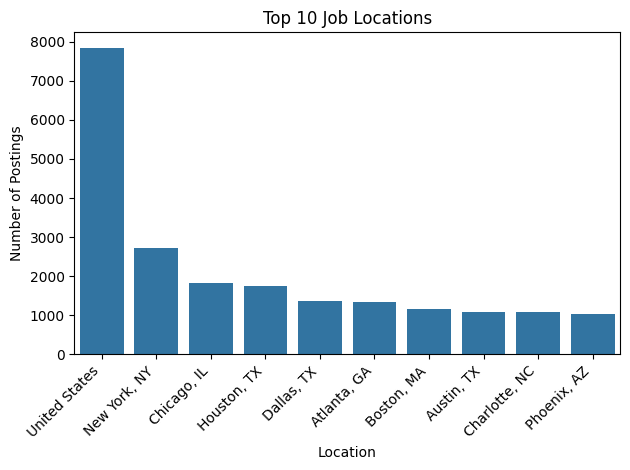

In [ ]:
top_locations = jobs_clean['location'].value_counts().head(10)

sns.barplot(x=top_locations.index, y=top_locations.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Job Locations')
plt.xlabel('Location')
plt.ylabel('Number of Postings')
plt.tight_layout()
plt.show()

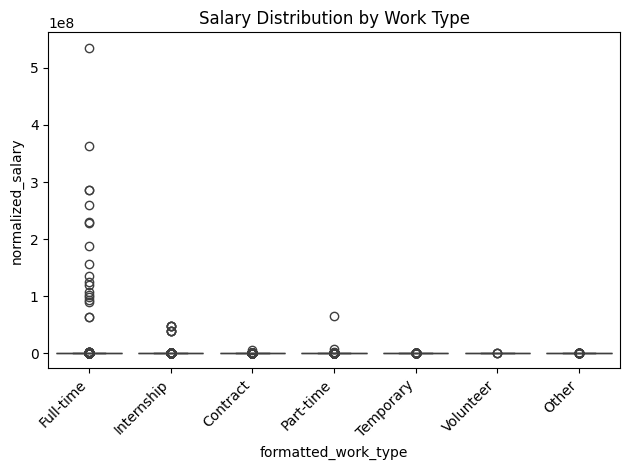

In [ ]:
salary_jobs = jobs_clean[jobs_clean['normalized_salary'].notna()]

sns.boxplot(
    data=salary_jobs,
    x='formatted_work_type',
    y='normalized_salary'
)
plt.xticks(rotation=45, ha='right')
plt.title('Salary Distribution by Work Type')
plt.tight_layout()
plt.show()

In [ ]:
cols = [
    "job_id",
    "company_name",
    "title",
    "location",
    "skills_desc",
    "formatted_work_type",
    "pay_period",
    "normalized_salary"
]
jobs_clean = jobs[cols].copy()

In [ ]:
job_ind_map = job_industries.merge(
    industries[['industry_id', 'industry_name']],
    on='industry_id',
    how='left'
)

jobs_industry = jobs_clean.merge(
    job_ind_map,
    on='job_id',
    how='left'
)

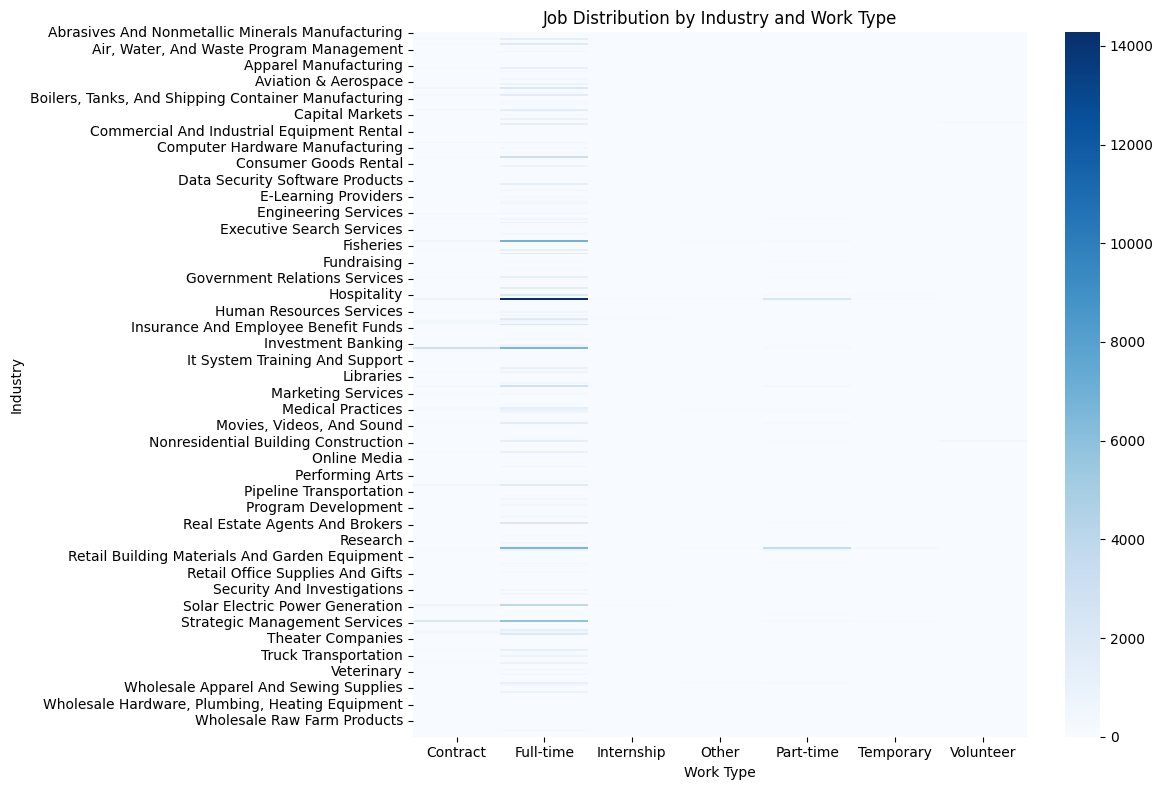

In [ ]:
pivot = jobs_industry.pivot_table(
    index='industry_name',
    columns='formatted_work_type',
    values='job_id',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap='Blues')
plt.title('Job Distribution by Industry and Work Type')
plt.ylabel('Industry')
plt.xlabel('Work Type')
plt.tight_layout()
plt.show()

To avoid future KeyErrors

In [ ]:
print(jobs_clean.columns)
print(job_industries.columns)
print(job_industries_counts.columns)

Index(['job_id', 'company_name', 'title', 'location', 'skills_desc',
       'formatted_work_type', 'pay_period', 'normalized_salary'],
      dtype='object')
Index(['job_id', 'industry_id'], dtype='object')
Index(['industry_id', 'job_counts'], dtype='object')


Top 10 Most in Demand Skills

In [ ]:
print(top_skills.head())
print(top_skills.columns)

               skill_name  count
0  Information Technology  25004
1                   Sales  20834
2              Management  20122
3           Manufacturing  17509
4    Health Care Provider  16504
Index(['skill_name', 'count'], dtype='object')


               skill_name  count
0  Information Technology  25004
1                   Sales  20834
2              Management  20122
3           Manufacturing  17509
4    Health Care Provider  16504


/tmp/ipython-input-3590523443.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_skills, x='count', y='skill_name', palette='Blues_r')


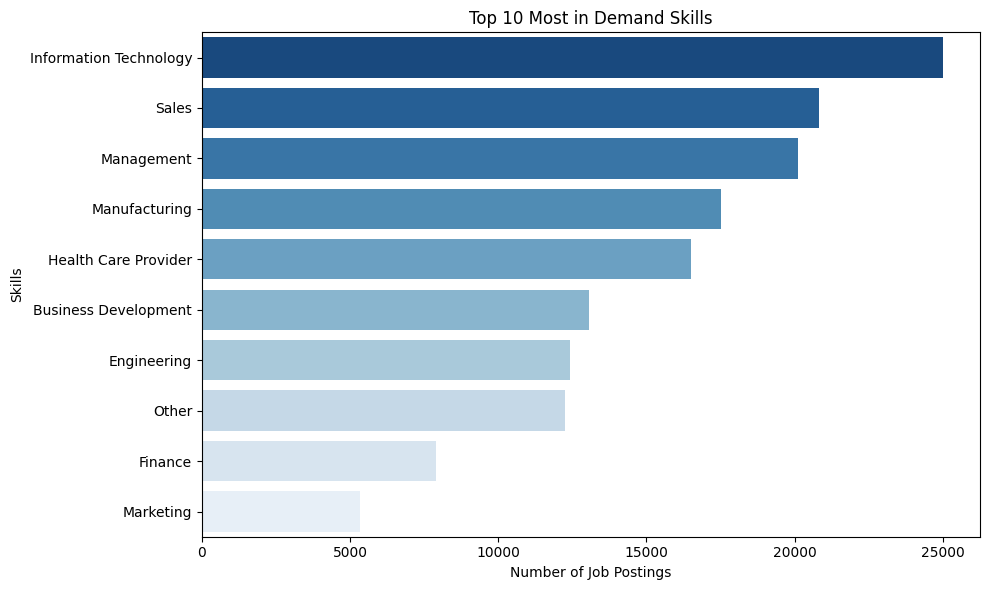

In [ ]:
skils_expanded = job_skills.merge(skills, on='skill_abr', how='left')

top_skills = (
    skills_expanded['skill_name']
    .value_counts()
    .head(10)
    .reset_index()
)

top_skills.columns = ['skill_name', 'count']

print(top_skills.head())

plt.figure(figsize=(10, 6))
sns.barplot(data=top_skills, x='count', y='skill_name', palette='Blues_r')
plt.title('Top 10 Most in Demand Skills')
plt.xlabel('Number of Job Postings')
plt.ylabel('Skills')
plt.tight_layout()
plt.show()

Top Hiring Companies

                                          company  count
0  Liberty Healthcare and Rehabilitation Services   1108
1                                 The Job Network   1003
2                                         J. Galt    604
3                                      TEKsystems    529
4                          Lowe's Companies, Inc.    527


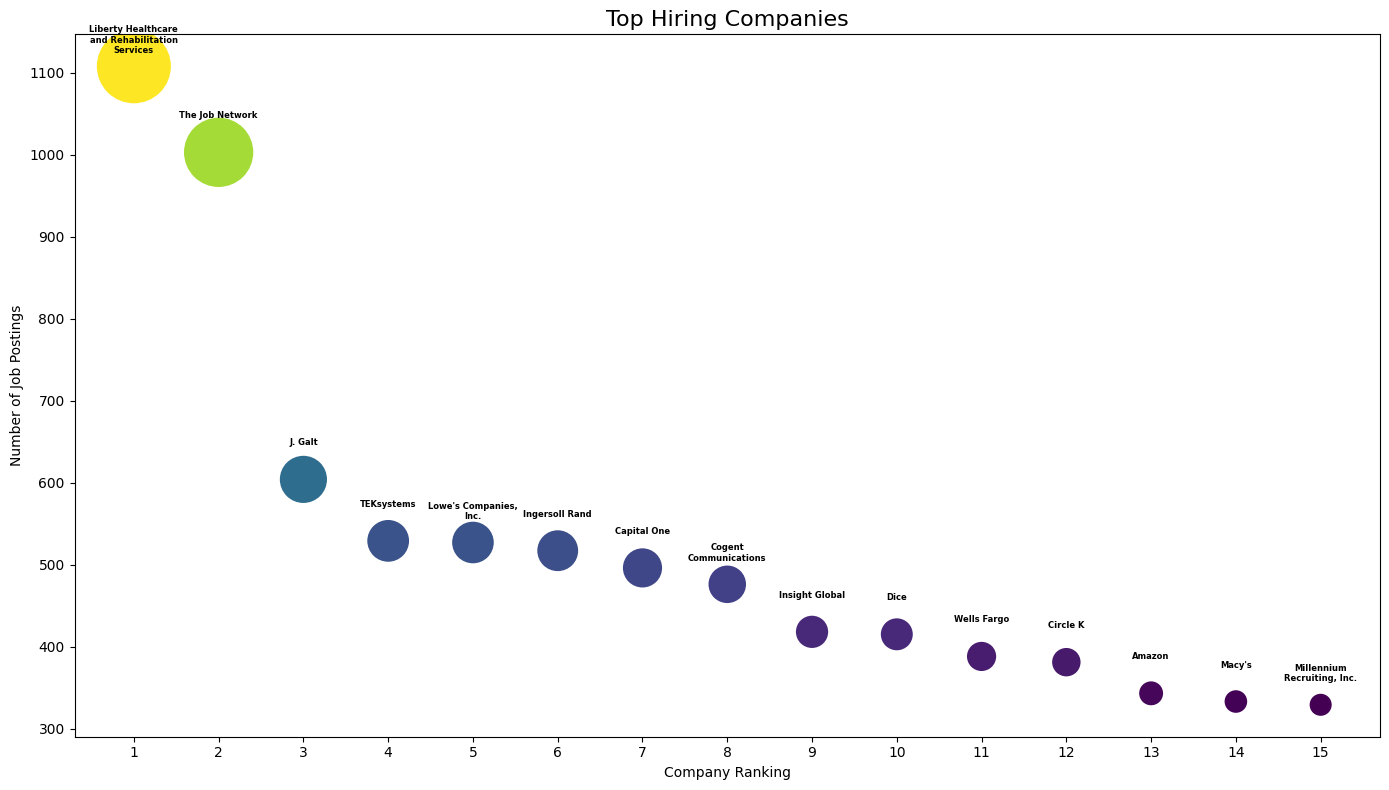

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

company_col = 'company_name'

s = jobs_clean[company_col].dropna()

top_companies = s.value_counts().head(15).reset_index()
top_companies.columns = ['company', 'count']

print(top_companies.head())

plt.figure(figsize=(14, 8))

sns.scatterplot(
    data=top_companies,
    x=top_companies.index,
    y='count',
    size='count',
    hue='count',
    sizes=(300, 3000),
    palette='viridis',
    legend=False
)

for i, row in top_companies.iterrows():
    company = row['company']
    y = row['count']

    wrapped_label = textwrap.fill(company, width=18)

    if company == "liberty Healthcare and Rehabilitation Services":
      y_text = y - 50
      va = 'bottom'
    else:
      y_text = y + 50
      va = 'top'

    plt.text(
        i,
        y_text,
        wrapped_label,
        ha='center',
        va=va,
        fontsize=6,
        weight='bold',
        color='black'
    )

plt.title('Top Hiring Companies', fontsize=16)
plt.xlabel('Company Ranking')
plt.ylabel('Number of Job Postings')
plt.xticks(top_companies.index, top_companies.index + 1)
plt.tight_layout()
plt.show()

Job Distribution by City (Treemap)

In [ ]:
print(jobs_clean.columns)

Index(['job_id', 'company_name', 'title', 'location', 'skills_desc',
       'formatted_work_type', 'pay_period', 'normalized_salary'],
      dtype='object')


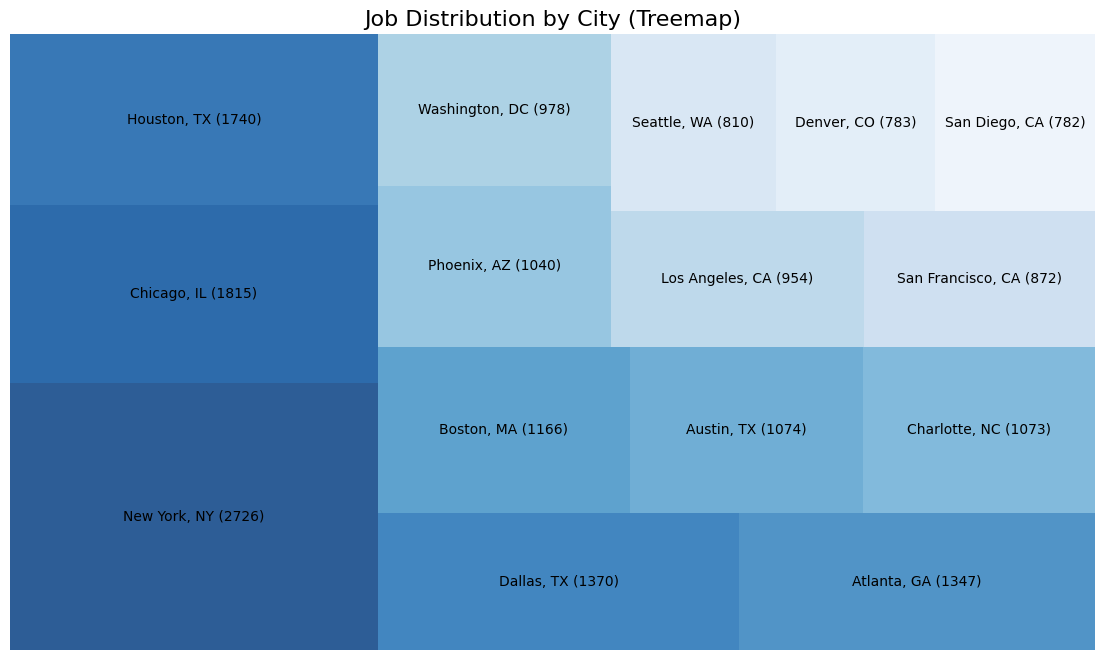

In [ ]:
city_like = jobs_clean['location'].str.contains(',', na=False)

city_series = jobs_clean.loc[city_like, 'location']

city_counts = (
    city_series
    .value_counts()
    .head(15)
    .reset_index(name='count')
    .rename(columns={'index': 'location'})
)

plt.figure(figsize=(14, 8))
squarify.plot(
    sizes=city_counts['count'],
    label=city_counts['location'] + ' (' + city_counts['count'].astype(str) + ')',
    color=sns.color_palette('Blues_r', len(city_counts)),
    alpha=0.85
)

plt.title('Job Distribution by City (Treemap)', fontsize=16)
plt.axis('off')
plt.show()

Job Type Breakdown (Piechart)

In [ ]:
print(jobs_clean.columns)

Index(['job_id', 'company_name', 'title', 'location', 'skills_desc',
       'formatted_work_type', 'pay_period', 'normalized_salary'],
      dtype='object')


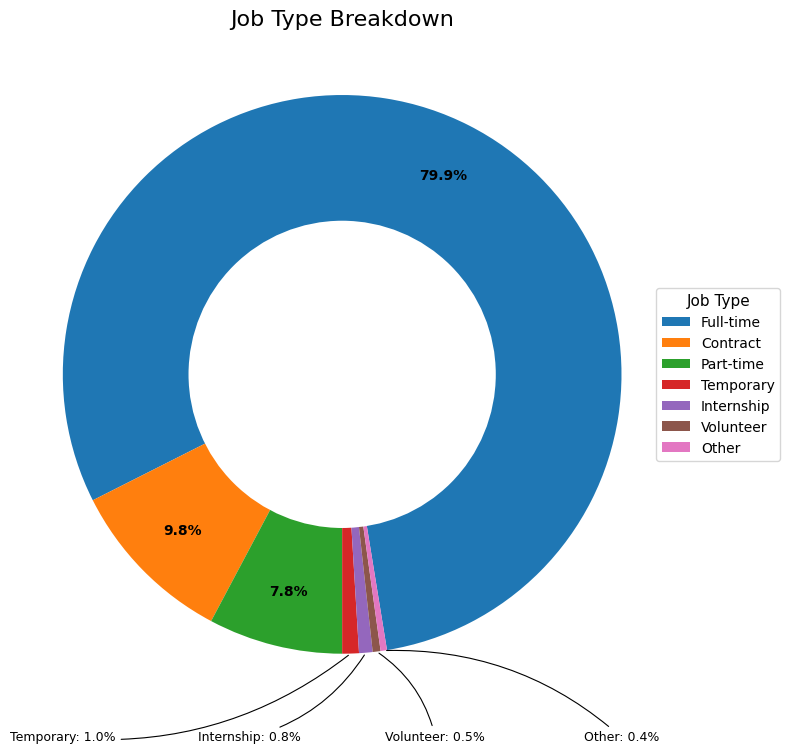

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

job_type_counts = job_type_counts.sort_values('count', ascending=False).reset_index(drop=True)

total = job_type_counts['count'].sum()
pcts = job_type_counts['count'] / total * 100

big_mask = pcts >= 5
small_mask = ~big_mask

large_fraction = pcts[big_mask].sum() / 100.0
startangle = 270 - 360 * large_fraction

def autopct_big(pct):
    return f"{pct:.1f}%" if pct >= 5 else ""

fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    job_type_counts['count'],
    labels=None,
    autopct=autopct_big,
    startangle=startangle,
    pctdistance=0.8,
    radius=1.0
)

centre_circle = plt.Circle((0, 0), 0.55, fc='white')
fig.gca().add_artist(centre_circle)

for a in autotexts:
    if a.get_text() != "":
        a.set_fontsize(10)
        a.set_color("black")
        a.set_weight("bold")

small_indices = np.where(small_mask)[0]
n_small = len(small_indices)

label_y = -1.3
x_positions = np.linspace(-1.0, 1.0, n_small) if n_small > 0 else []

for i, idx in enumerate(small_indices):
    wedge = wedges[idx]
    label = job_type_counts.loc[idx, 'work_type']
    pct = pcts[idx]

    angle = (wedge.theta2 + wedge.theta1) / 2.0
    angle_rad = np.deg2rad(angle)
    x = np.cos(angle_rad)
    y = np.sin(angle_rad)

    label_x = x_positions[i]
    ha = 'center'

    ax.annotate(
        f"{label}: {pct:.1f}%",
        xy=(x, y),
        xytext=(label_x, label_y),
        ha=ha,
        va='center',
        fontsize=9,
        arrowprops=dict(
            arrowstyle='-',
            connectionstyle='arc3,rad=0.2',
            linewidth=0.8
        )
    )

ax.legend(
    wedges,
    job_type_counts['work_type'],
    title="Job Type",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10,
    title_fontsize=11
)

ax.set_title('Job Type Breakdown', fontsize=16)
ax.axis('equal')
plt.tight_layout()
plt.show()

Word Cloud

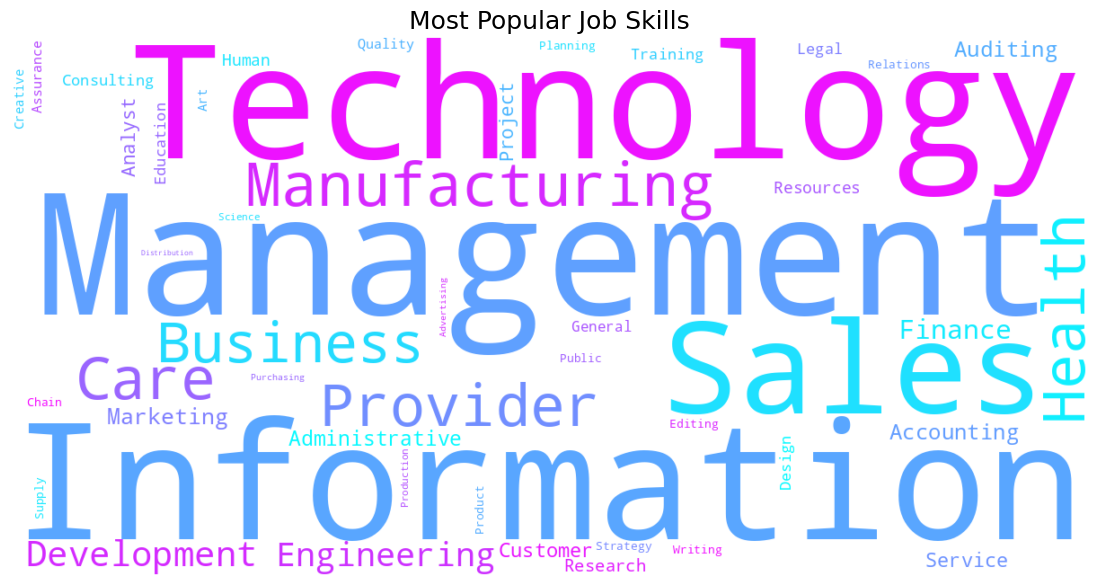

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

skills_expanded = job_skills.merge(skills, on='skill_abr', how='left')

skills_expanded = skills_expanded.dropna(subset=['skill_name'])

skill_text = " ".join(skills_expanded['skill_name'].tolist())

wc = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    colormap="cool",
    collocations=False,
    prefer_horizontal=0.7
).generate(skill_text)

plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Popular Job Skills", fontsize=18)
plt.show()


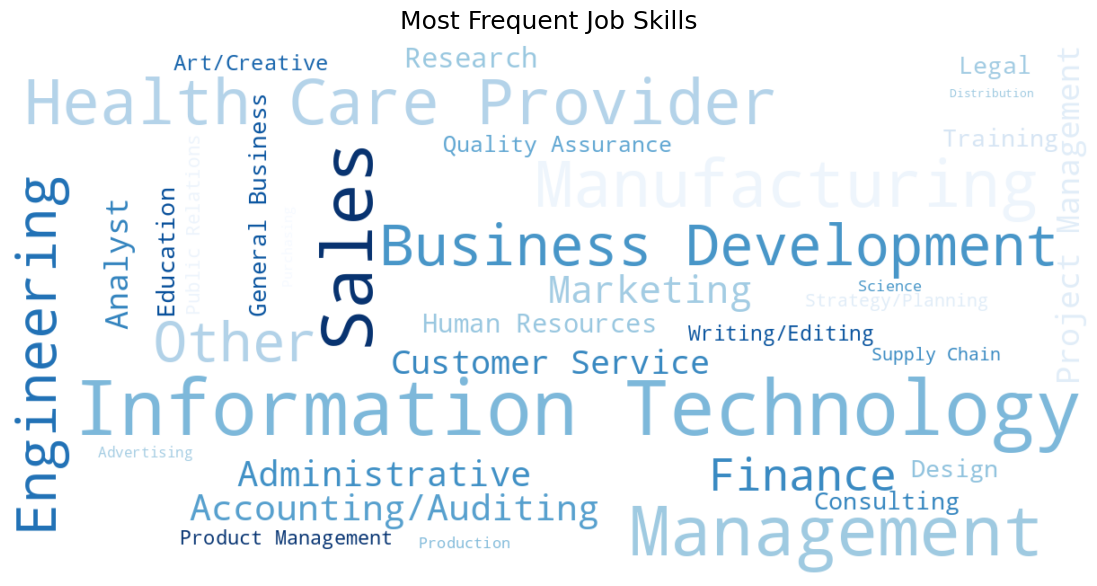

In [ ]:
skill_freq = (
    skills_expanded['skill_name']
    .value_counts()
    .to_dict()
)

wc = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    colormap="Blues",
    collocations=False
).generate_from_frequencies(skill_freq)

plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Job Skills", fontsize=18)
plt.show()